In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/Vehicle Repair Dashboard/Repair Records-Grid view (2).csv")

In [5]:
data.head()

,SL No.,Registration Number,Vehicle Status (from Registration Number) 2,Model,Incident Date,Driver Deduction Completed by Labanya,Vehicle Hub,Driver ID,Driver Name,Driver Type,...,Maintenance Remarks,Vehicle Status (from Registration Number) 3,Field 44,Miscellaneous Damages Remarks,Driver Penalty rollup,Repair KM Reading,Email Subject Line,Vehicle Status (from Registration Number) 4,Deduction Completed,Deduction Pending
0,1,WB07K0502,Running,Xpres-T Electra,17/6/2023,checked,Khiderpore,14066164.0,Sk Aziz,NaN,...,NaN,Running,NaN,NaN,INR 3000.00,NaN,NaN,Running,NaN,3000
1,2,WB07K1027,Down,Xpres-T Ziptron,20/7/2023,checked,O2,14093377.0,samim Reja,NaN,...,DO pending from Sriram. Cab ready,Down,NaN,NaN,INR 3000.00,NaN,NaN,Down,NaN,3000
2,3,WB05A0866,Running,Xpres-T Ziptron,20/7/2023,checked,O2,14280489.0,Navonil Halder,NaN,...,NaN,Running,NaN,NaN,INR 5000.00,NaN,NaN,Running,NaN,5000
3,4,WB05A0917,Running,Xpres-T Ziptron,20/7/2023,checked,O2,14231327.0,Romjan Ali,NaN,...,NaN,Running,NaN,NaN,INR 5000.00,NaN,NaN,Running,NaN,5000
4,5,WB05A0885,Down,Xpres-T Ziptron,15/7/2023,checked,O2,14148098.0,Mohit Kumar Shaw,NaN,...,12th April delivery commited by kumaresh,Down,NaN,NaN,INR 5000.00,NaN,NaN,Down,NaN,5000


In [6]:
data['Damage Type'].value_counts()

Damage Type
Side Mirror 1 piece                                    606
No-Driver Fault- Miscellaneous Damages                 527
Major Accident with spot survey and spot photos        151
Tail Light 1 Piece                                     115
Major Accident without spot survey and spot photos     110
                                                      ... 
1 Panel 1 Bumper,Dicky Lock Damage                       1
Panel 1 Piece,Dicky Lock Damage                          1
Panel 2 Piece,Headlight 1 Piece                          1
-_______-R                                               1
Headlight 1 Piece,Side Mirror 1 piece,Panel 1 Piece      1
Name: count, Length: 135, dtype: int64

In [7]:
import re

# Define regular expressions or keywords for each category
categories = {
    "major": r"major|accident|survey|photos|spot|miscellaneous|fault",
    "side_mirror": r"side\s*mirror|mirror",
    "panel": r"panel",
    "light": r"head\s*light|tail\s*light",
    "bumper": r"bumper",
}

# Create a dictionary to store counts for each category
damage_counts = {category: 0 for category in categories}
damage_counts["others"] = 0

# Iterate through the list of damage types
damage_types = data['Damage Type']

for damage_type in damage_types:
    classified = False
    for category, pattern in categories.items():
        if re.search(pattern, damage_type, re.IGNORECASE):
            damage_counts[category] += 1
            classified = True
            break
    if not classified:
        damage_counts["others"] += 1

# Print the counts for each category
for category, count in damage_counts.items():
    print(f"{category.capitalize()}: {count}")


Major: 855
Side_mirror: 654
Panel: 249
Light: 296
Bumper: 80
Others: 264


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 55 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   SL No.                                                    2398 non-null   int64  
 1   Registration Number                                       2397 non-null   object 
 2   Vehicle Status (from Registration Number) 2               2397 non-null   object 
 3   Model                                                     2397 non-null   object 
 4   Incident Date                                             2396 non-null   object 
 5   Driver Deduction Completed by Labanya                     1601 non-null   object 
 6   Vehicle Hub                                               2397 non-null   object 
 7   Driver ID                                                 2396 non-null   float64
 8   Driver Name       

In [9]:
import re

# Define regular expressions or keywords for each category
categories = {
    "major": r"major|accident",
    "side_mirror": r"side\s*mirror|mirror",
    "panel": r"panel",
    "light": r"head\s*light|tail\s*light",
    "bumper": r"bumper",
    "Misc":r"miscellaneous"
}

# Create a dictionary to store counts for each category
damage_counts = {category: 0 for category in categories}
damage_counts["others"] = 0

# Iterate through the list of damage types and classify them
classified_list = []
for damage_type in data['Damage Type']:
    classified = False
    for category, pattern in categories.items():
        if re.search(pattern, damage_type, re.IGNORECASE):
            classified_list.append(category)
            damage_counts[category] += 1
            classified = True
            break
    if not classified:
        classified_list.append("others")
        damage_counts["others"] += 1

# Add the classified list as a new column in the DataFrame
data['Classified'] = classified_list

# Print the counts for each category
for category, count in damage_counts.items():
    print(f"{category.capitalize()}: {count}")

# Optionally, you can also save the DataFrame to a new CSV file
# data.to_csv('classified_data.csv', index=False)


Major: 267
Side_mirror: 660
Panel: 255
Light: 296
Bumper: 81
Misc: 575
Others: 264


In [10]:
data['Classified'].value_counts()

Classified
side_mirror    660
Misc           575
light          296
major          267
others         264
panel          255
bumper          81
Name: count, dtype: int64

In [11]:
data.groupby('Driver ID')['Classified'].value_counts()

Driver ID   Classified 
1.0         side_mirror    24
            Misc           15
            light           6
            panel           6
            others          3
                           ..
15593448.0  Misc            1
15607479.0  side_mirror     1
15614944.0  side_mirror     1
15621989.0  Misc            1
15691382.0  panel           1
Name: count, Length: 1585, dtype: int64

In [12]:
driver_with_max_entries = data['Driver ID'].value_counts().idxmax()

print("Driver ID with maximum entries:", driver_with_max_entries)


Driver ID with maximum entries: 9.0


In [13]:
# Find the 'Driver ID' with the maximum number of entries in descending order
sorted_driver_entries = data['Driver ID'].value_counts().sort_values(ascending=False)

# Select the first index, which corresponds to the 'Driver ID' with the maximum entries
driver_with_max_entries = sorted_driver_entries.index[0]



In [14]:
sorted_driver_entries


Driver ID
9.0           92
1.0           57
14405440.0    51
14415037.0    51
14049427.0    38
              ..
15040414.0     1
14903639.0     1
13183627.0     1
14525883.0     1
14480883.0     1
Name: count, Length: 979, dtype: int64

100 cars for B2B and 500 for B2C

In [15]:
data['Driver Type'].value_counts()

Driver Type
B2C    1588
B2B     444
Name: count, dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 56 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   SL No.                                                    2398 non-null   int64  
 1   Registration Number                                       2397 non-null   object 
 2   Vehicle Status (from Registration Number) 2               2397 non-null   object 
 3   Model                                                     2397 non-null   object 
 4   Incident Date                                             2396 non-null   object 
 5   Driver Deduction Completed by Labanya                     1601 non-null   object 
 6   Vehicle Hub                                               2397 non-null   object 
 7   Driver ID                                                 2396 non-null   float64
 8   Driver Name       

In [17]:
data.groupby("Vehicle Hub")['Our Cost'].mean()

Vehicle Hub
Axis            775.618868
EVRE           1343.604651
HIDCO          1360.320186
Hyatt          4475.400000
Khiderpore     2384.946309
NDITA           760.915952
O2             1508.767892
Rishi Tower    1583.789474
Somponno       -647.500000
Name: Our Cost, dtype: float64

In [18]:
data.groupby("Vehicle Hub")['Registration Number'].value_counts()

Vehicle Hub  Registration Number
Axis         WB04J2284              9
             WB04J2477              9
             WB04J2489              9
             WB04J2576              7
             WB04J2487              7
                                   ..
Somponno     WB04J4183              1
             WB04J4168              1
             WB04J4161              1
             WB04J4145              1
             WB04J4230              1
Name: count, Length: 551, dtype: int64

In [19]:
import pandas as pd

# Assuming you have a DataFrame named 'data' containing the relevant information

# Total number of cars in each Vehicle Hub
total_cars_per_Vehicle  = data.groupby('Vehicle Hub')['Registration Number'].nunique()

# Total number of accidents by a car grouped by Vehicle Hub
total_accidents_per_car_per_Vehicle  = data.groupby(['Vehicle Hub', 'Registration Number']).size().reset_index(name='Accidents')

# Average accidents by a car in each Vehicle Hub
average_accidents_per_Vehicle  = total_accidents_per_car_per_Vehicle.groupby('Vehicle Hub')['Accidents'].mean()

print("Total number of cars in each Vehicle Hub:")
print(total_cars_per_Vehicle )
print("\nTotal number of accidents by a car grouped by Vehicle Hub:")
print(total_accidents_per_car_per_Vehicle )
print("\nAverage accidents by a car in each Vehicle Hub:")
print(average_accidents_per_Vehicle )


Total number of cars in each Vehicle Hub:
Vehicle Hub
Axis            86
EVRE           116
HIDCO           71
Hyatt            6
Khiderpore      47
NDITA          108
O2              89
Rishi Tower     19
Somponno         9
Name: Registration Number, dtype: int64

Total number of accidents by a car grouped by Vehicle Hub:
    Vehicle Hub Registration Number  Accidents
0          Axis           WB04J2189          1
1          Axis           WB04J2256          4
2          Axis           WB04J2284          9
3          Axis           WB04J2319          4
4          Axis           WB04J2322          3
..          ...                 ...        ...
546    Somponno           WB04J4168          1
547    Somponno           WB04J4180          2
548    Somponno           WB04J4183          1
549    Somponno           WB04J4198          1
550    Somponno           WB04J4230          1

[551 rows x 3 columns]

Average accidents by a car in each Vehicle Hub:
Vehicle Hub
Axis           3.081395
EV

Vehicle Hub
Axis            775.618868
EVRE           1343.604651
HIDCO          1360.320186
Hyatt          4475.400000
Khiderpore     2384.946309
NDITA           760.915952
O2             1508.767892
Rishi Tower    1583.789474
Somponno       -647.500000
Name: Our Cost, dtype: float64
Average accidents by a car in each Vehicle Hub:
Vehicle Hub
Axis           3.081395
EVRE           2.965517
HIDCO          6.070423
Hyatt          3.333333
Khiderpore     3.170213
NDITA          5.398148
O2             5.808989
Rishi Tower    4.000000
Somponno       1.333333
Name: Accidents, dtype: float64

In [20]:
average_accidents_per_Vehicle * data.groupby("Vehicle Hub")['Our Cost'].mean()


Vehicle Hub
Axis            2389.988372
EVRE            3984.482759
HIDCO           8257.718310
Hyatt          14918.000000
Khiderpore      7560.787234
NDITA           4107.537037
O2              8764.415730
Rishi Tower     6335.157895
Somponno        -863.333333
dtype: float64

In [21]:
data['Our Cost'].mean()

1264.4482902418683

In [22]:
5500/4.35

1264.3678160919542

In [23]:
data['Registration Number'].nunique()

551

In [24]:
2400/551

4.3557168784029034

Vehicle Hub
Axis            2389.988372
EVRE            3984.482759
HIDCO           8257.718310
Hyatt          14918.000000
Khiderpore      7560.787234
NDITA           4107.537037
O2              8764.415730
Rishi Tower     6335.157895
Somponno        -863.333333
average 5.5k

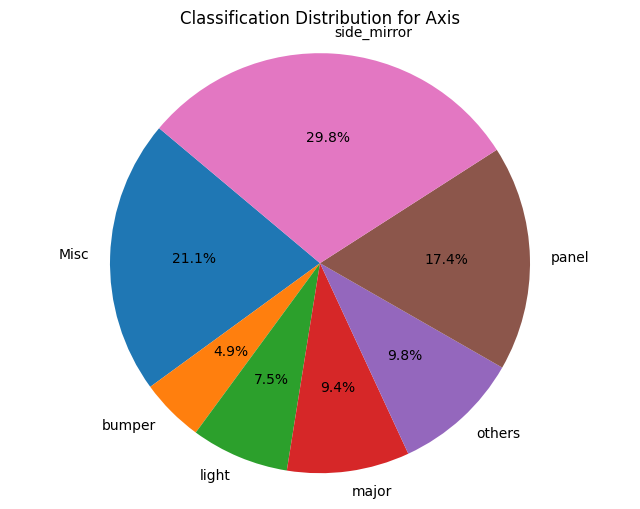

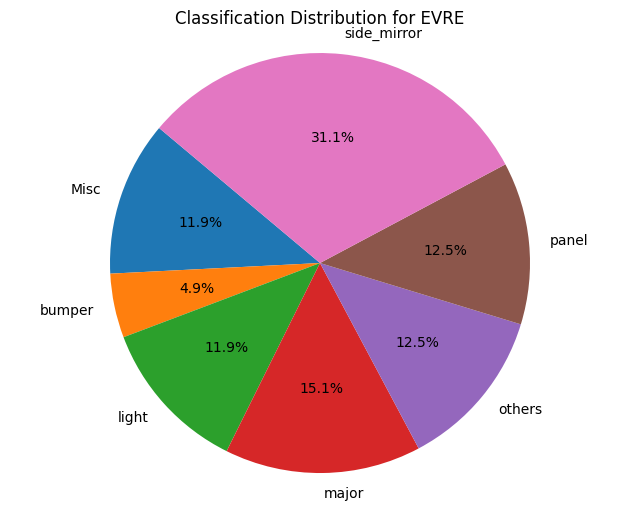

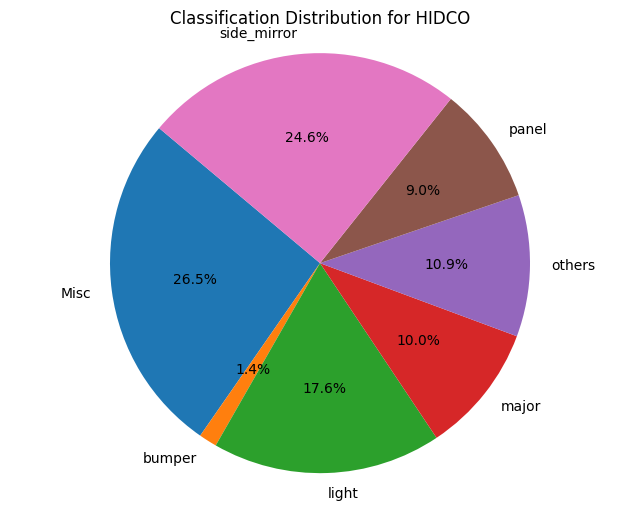

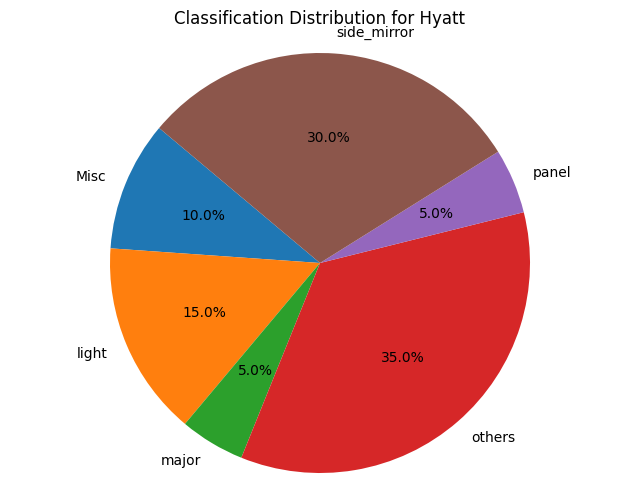

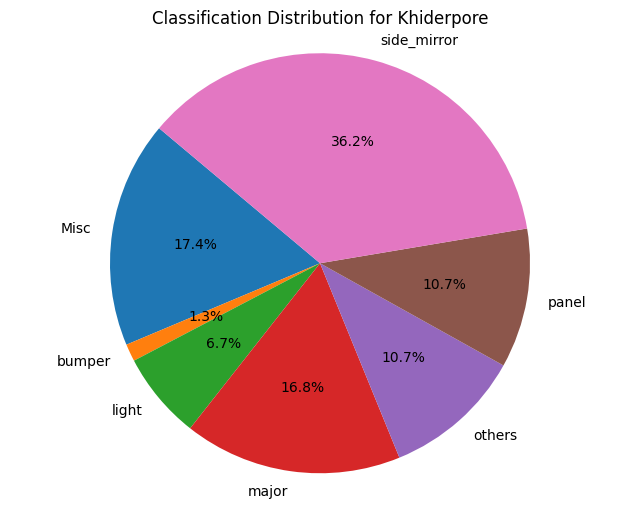

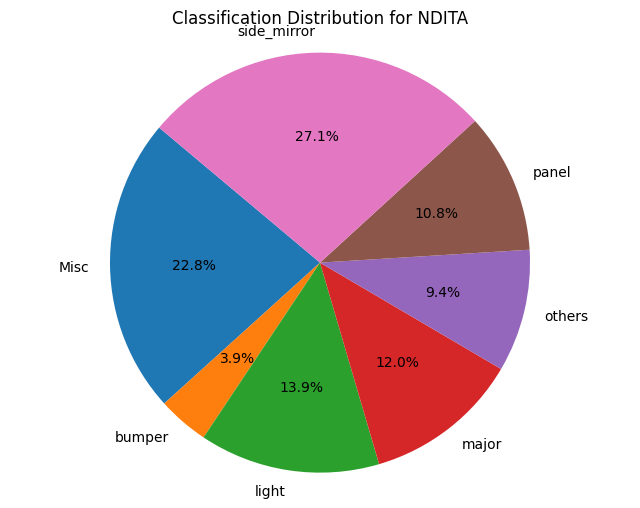

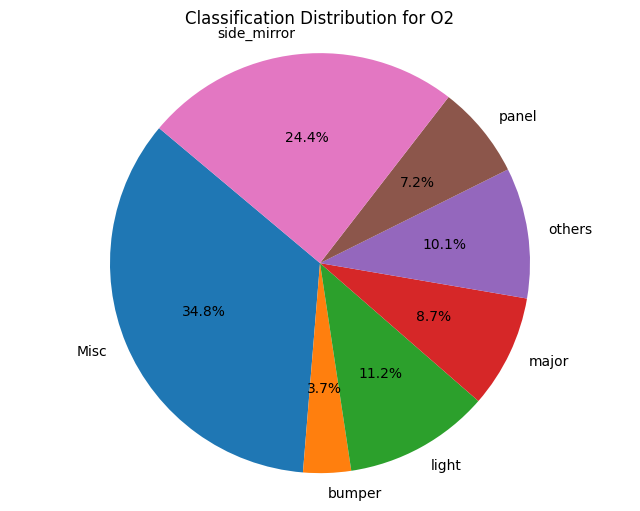

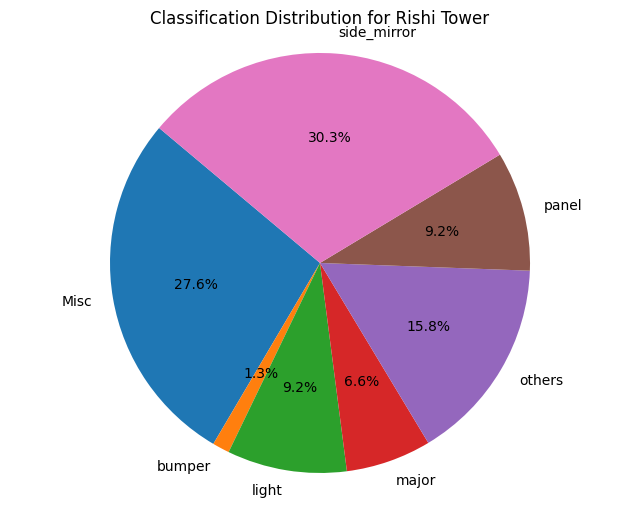

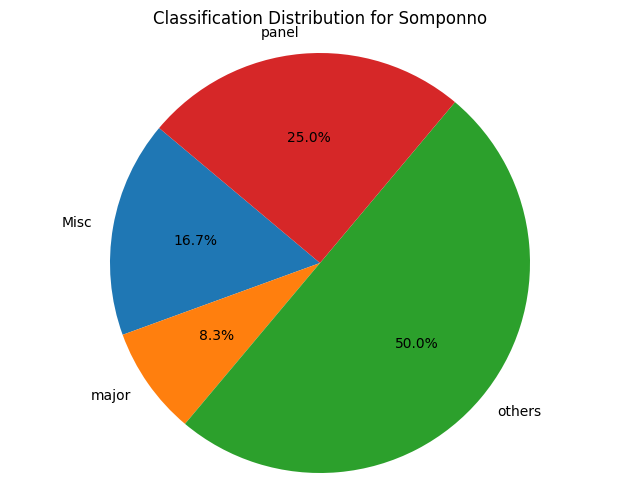

In [25]:
import matplotlib.pyplot as plt

grouped_data = data.groupby(['Vehicle Hub', 'Classified']).size().reset_index(name='Count')

for hub in grouped_data['Vehicle Hub'].unique():
    hub_data = grouped_data[grouped_data['Vehicle Hub'] == hub]
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.pie(hub_data['Count'], labels=hub_data['Classified'], autopct='%1.1f%%', startangle=140)
    plt.title(f"Classification Distribution for {hub}")
    plt.axis('equal')  
    plt.show()


In [26]:
data.groupby('Classified')['Our Cost'].mean()

Classified
Misc            721.852174
bumper         -283.913580
light          1283.108108
major          5354.344569
others          818.795455
panel           885.800000
side_mirror     588.830303
Name: Our Cost, dtype: float64

In [27]:
data.groupby('Classified')['Our Cost'].sum()

Classified
Misc            415065
bumper          -22997
light           379800
major          1429610
others          216162
panel           225879
side_mirror     388628
Name: Our Cost, dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 56 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   SL No.                                                    2398 non-null   int64  
 1   Registration Number                                       2397 non-null   object 
 2   Vehicle Status (from Registration Number) 2               2397 non-null   object 
 3   Model                                                     2397 non-null   object 
 4   Incident Date                                             2396 non-null   object 
 5   Driver Deduction Completed by Labanya                     1601 non-null   object 
 6   Vehicle Hub                                               2397 non-null   object 
 7   Driver ID                                                 2396 non-null   float64
 8   Driver Name       

In [29]:
data.groupby('Classified')['Driver Penalty'].mean()

TypeError: Could not convert INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 500.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 500.00INR 0.00INR 500.00INR 0.00INR 0.00INR 500.00INR 0.00INR 500.00INR 0.00INR 500.00INR 0.00INR 0.00INR 0.00INR 500.00INR 500.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00, INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00INR 0.00INR 500.00INR 0.00INR 500.00INR 0.00, INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00, INR 2000.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00, INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00INR 0.00INR 0.00, INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 500.00INR 500.00INR 0.00INR 500.00INR 500.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00, INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 500.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00INR 0.00 to numeric

In [30]:
data['Driver Penalty'] = data['Driver Penalty'].str.replace('INR ', '', regex=True).str.replace(',', '', regex=True)


In [31]:
data['Driver Penalty'].head()

0    3000.00
1    3000.00
2    5000.00
3    5000.00
4    5000.00
Name: Driver Penalty, dtype: object

In [32]:
data.groupby('Classified')['Driver Penalty'].mean()

TypeError: Could not convert 0.000.000.000.000.000.00500.00500.00500.000.000.000.000.00500.00500.000.00500.000.000.00500.000.00500.000.00500.000.000.000.00500.00500.00500.000.000.000.000.000.000.00500.000.000.000.000.000.000.000.000.000.000.00500.000.000.000.000.000.00500.000.000.000.000.000.000.000.000.00500.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.00500.000.000.000.000.000.000.000.000.000.000.00 0.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.00500.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.00500.000.000.000.000.000.00500.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.00500.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.00500.000.000.00500.000.00500.000.00 0.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.00500.000.000.000.000.000.000.000.00500.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.00 2000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.00500.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.00 0.000.000.000.00500.000.000.000.00 0.000.000.000.000.000.000.000.000.000.000.000.000.00500.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.00500.00500.00500.000.00500.00500.00500.000.000.000.000.000.000.000.000.00500.000.00 0.000.000.000.000.00500.00500.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.00500.000.00500.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.00500.000.000.000.000.00500.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.00 to numeric

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 56 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   SL No.                                                    2398 non-null   int64  
 1   Registration Number                                       2397 non-null   object 
 2   Vehicle Status (from Registration Number) 2               2397 non-null   object 
 3   Model                                                     2397 non-null   object 
 4   Incident Date                                             2396 non-null   object 
 5   Driver Deduction Completed by Labanya                     1601 non-null   object 
 6   Vehicle Hub                                               2397 non-null   object 
 7   Driver ID                                                 2396 non-null   float64
 8   Driver Name       

In [43]:
more_than5_entries=sorted_driver_entries.head(55)


In [44]:
more_than5_entries.tail(6)

Driver ID
13875915.0    6
14231712.0    6
13700952.0    6
15166674.0    6
15180096.0    6
13336837.0    6
Name: count, dtype: int64

In [50]:
more_than5_entries_list=more_than5_entries.index

In [51]:
more_than5_entries_list

Index([       9.0,        1.0, 14405440.0, 14415037.0, 14049427.0,        2.0,
       14303026.0, 14427441.0, 13330856.0, 14422376.0, 14585540.0, 14666039.0,
       13160177.0, 14175045.0,        4.0, 13708700.0, 14472863.0, 14715399.0,
       13338596.0, 14754051.0, 14186371.0, 14306333.0, 14818652.0, 14463764.0,
       14560421.0, 14093377.0, 14298202.0, 14336506.0, 14132627.0, 14938174.0,
       14913659.0, 13944301.0, 14463090.0, 15417445.0, 14385954.0, 14310580.0,
              3.0, 14904308.0, 13147675.0, 15225838.0, 13418181.0, 14310627.0,
       15022421.0, 14206335.0, 14132282.0, 13170606.0, 13152077.0, 14211192.0,
       14372346.0, 13875915.0, 14231712.0, 13700952.0, 15166674.0, 15180096.0,
       13336837.0],
      dtype='float64', name='Driver ID')

In [69]:
driver_ids_set = set(more_than5_entries_list)

# Values to be removed
values_to_remove = {1.0, 2.0, 3.0, 4.0, 9.0}

# Removing the values
for value in values_to_remove:
    driver_ids_set.discard(value)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 56 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   SL No.                                                    2398 non-null   int64  
 1   Registration Number                                       2397 non-null   object 
 2   Vehicle Status (from Registration Number) 2               2397 non-null   object 
 3   Model                                                     2397 non-null   object 
 4   Incident Date                                             2396 non-null   object 
 5   Driver Deduction Completed by Labanya                     1601 non-null   object 
 6   Vehicle Hub                                               2397 non-null   object 
 7   Driver ID                                                 2396 non-null   float64
 8   Driver Name       

In [71]:
filtered_data = data[data['Driver ID'].isin(driver_ids_set)]


In [72]:
filtered_data.groupby('Vehicle Hub')['Vehicle Hub'].value_counts()

Vehicle Hub
Axis            45
EVRE            61
HIDCO          153
Hyatt            2
Khiderpore      23
NDITA          110
O2             121
Rishi Tower     28
Name: count, dtype: int64

In [73]:
driver_ids_set

{13147675.0,
 13152077.0,
 13160177.0,
 13170606.0,
 13330856.0,
 13336837.0,
 13338596.0,
 13418181.0,
 13700952.0,
 13708700.0,
 13875915.0,
 13944301.0,
 14049427.0,
 14093377.0,
 14132282.0,
 14132627.0,
 14175045.0,
 14186371.0,
 14206335.0,
 14211192.0,
 14231712.0,
 14298202.0,
 14303026.0,
 14306333.0,
 14310580.0,
 14310627.0,
 14336506.0,
 14372346.0,
 14385954.0,
 14405440.0,
 14415037.0,
 14422376.0,
 14427441.0,
 14463090.0,
 14463764.0,
 14472863.0,
 14560421.0,
 14585540.0,
 14666039.0,
 14715399.0,
 14754051.0,
 14818652.0,
 14904308.0,
 14913659.0,
 14938174.0,
 15022421.0,
 15166674.0,
 15180096.0,
 15225838.0,
 15417445.0}

In [76]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544 entries, 1 to 2393
Data columns (total 56 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   SL No.                                                    544 non-null    int64  
 1   Registration Number                                       543 non-null    object 
 2   Vehicle Status (from Registration Number) 2               543 non-null    object 
 3   Model                                                     543 non-null    object 
 4   Incident Date                                             544 non-null    object 
 5   Driver Deduction Completed by Labanya                     394 non-null    object 
 6   Vehicle Hub                                               543 non-null    object 
 7   Driver ID                                                 544 non-null    float64
 8   Driver Name             

In [81]:


# Calculate the count of entries for each driver per hub
hub_driver_counts = filtered_data.groupby(['Vehicle Hub', 'Driver ID']).size().reset_index(name='Driver Count')



In [84]:
hub_driver_counts.to_excel("hub_driver_counts.xlsx", index=True)

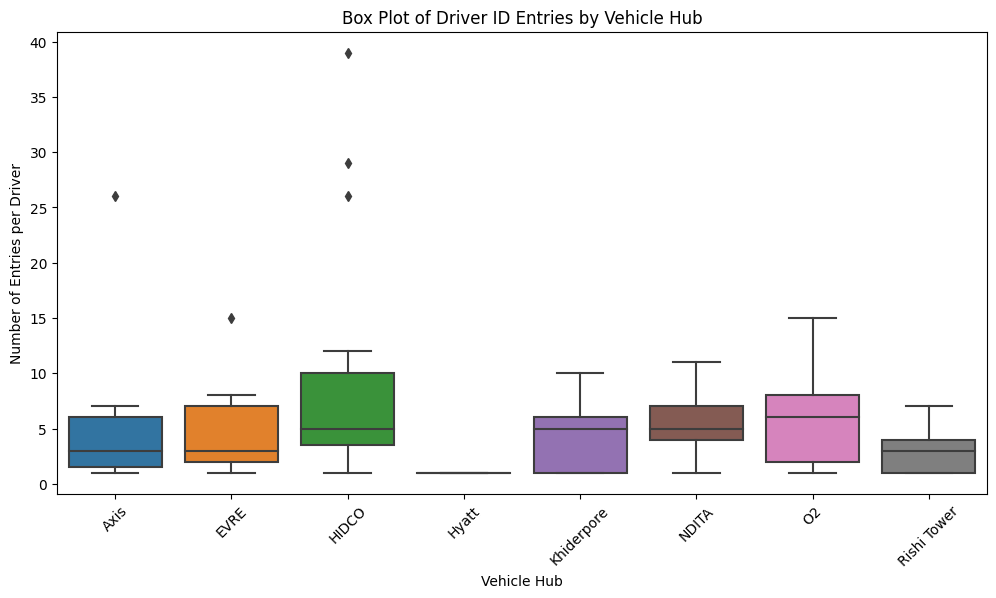

In [82]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle Hub', y='Driver Count', data=hub_driver_counts)
plt.title('Box Plot of Driver ID Entries by Vehicle Hub')
plt.xlabel('Vehicle Hub')
plt.ylabel('Number of Entries per Driver')
plt.xticks(rotation=45)
plt.show()

HIDCO	14,405,440	39
HIDCO	14,049,427	29
Axis	14,303,026	26
HIDCO	14,415,037	26
EVRE	14,415,037	15
O2	    13,330,856	15
HIDCO	14,427,441	12
NDITA	14,585,540	11
O2	    14,666,039	11


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 56 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   SL No.                                                    2398 non-null   int64  
 1   Registration Number                                       2397 non-null   object 
 2   Vehicle Status (from Registration Number) 2               2397 non-null   object 
 3   Model                                                     2397 non-null   object 
 4   Incident Date                                             2396 non-null   object 
 5   Driver Deduction Completed by Labanya                     1601 non-null   object 
 6   Vehicle Hub                                               2397 non-null   object 
 7   Driver ID                                                 2396 non-null   float64
 8   Driver Name       

In [86]:
data_new=data[['Registration Number','Model','Incident Date','Vehicle Hub','Driver ID','Driver Type','Classified','Our Cost','Downtime (Days)','Repair Vendors']]

In [87]:
data_new.to_excel("data_for_tableau.xlsx",index=True)

In [89]:
Driver_wise_downtime=data.groupby('Driver ID')['Downtime (Days)'].sum()
Driver_wise_downtime.to_excel("Driver_wise_downtime.xlsx",index=True)

In [92]:
unique_vendors_per_vehicle = data.groupby('Registration Number')['Repair Vendors'].nunique()
print(unique_vendors_per_vehicle)
unique_vendors_per_vehicle.to_excel("unique_vendors_per_vehicle_repair.xlsx",index=True)

Registration Number
WB04J0905    2
WB04J0909    5
WB04J0910    2
WB04J0915    1
WB04J0925    1
            ..
WB19L7529    1
WB19L7538    1
WB19L7544    1
WB19L7549    1
WB19L7693    1
Name: Repair Vendors, Length: 551, dtype: int64
